### EDA

Сначала посмотрим на данные и выделим вообще ключевые параметры

In [1]:
import pandas as pd

target_lec = pd.read_csv('target_lec.csv', parse_dates=['timestamp'])
data_lec = pd.read_csv('data_lec.csv', parse_dates=['timestamp'])

print("=== target_lec Info ===")
print(target_lec.info())
print("\n=== target_lec Head ===")
print(target_lec.head())
print("\n=== target_lec Missing Values ===")
print(target_lec.isnull().sum())

print("\n=== data_lec Info ===")
print(data_lec.info())
print("\n=== data_lec Head ===")
print(data_lec.head())
print("\n=== data_lec Missing Values ===")
print(data_lec.isnull().sum())

print("\n=== data_lec Describe ===")
print(data_lec.describe())


=== target_lec Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   timestamp  158 non-null    datetime64[ns, UTC]
 1   target     158 non-null    float64            
dtypes: datetime64[ns, UTC](1), float64(1)
memory usage: 2.6 KB
None

=== target_lec Head ===
                  timestamp   target
0 2023-09-06 07:17:00+00:00  0.99480
1 2023-09-06 08:46:00+00:00  1.98218
2 2023-09-06 11:24:00+00:00  2.29000
3 2023-09-06 13:21:00+00:00  2.13000
4 2023-09-06 14:53:00+00:00  1.15249

=== target_lec Missing Values ===
timestamp    0
target       0
dtype: int64

=== data_lec Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81255 entries, 0 to 81254
Data columns (total 49 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   Unn


=== Частота интервалов времени в data_lec ===
timestamp
0 days 00:01:00    80024
0 days 00:00:23       29
0 days 00:00:37       29
0 days 00:00:22       28
0 days 00:00:38       28
0 days 00:00:52       27
0 days 00:00:33       27
0 days 00:00:27       27
0 days 00:00:46       27
0 days 00:00:14       27
Name: count, dtype: int64

=== Процент пропусков в data_lec ===
ppm1                       1.195003
temp1                      0.758107
temp2                      0.758107
ppm2                       1.195003
gas_opening1               0.758107
press1                     0.758107
rotationspeed1             0.758107
press3                     0.758107
temp3                      0.758107
press2                     0.758107
press4                     0.758107
temp4                      0.758107
electric_ampere1           0.758107
speed1                     0.758107
press5                     0.758107
electric_consumption2      0.758107
press6                     0.758107
speed2           

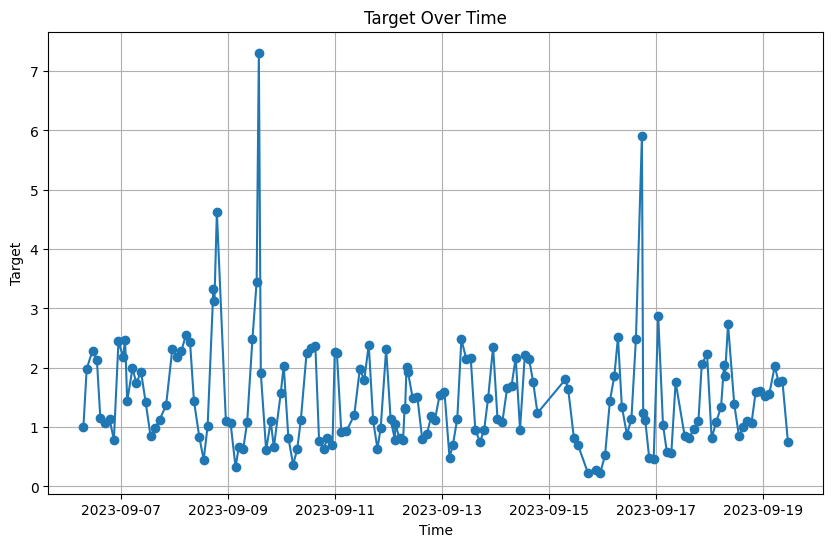

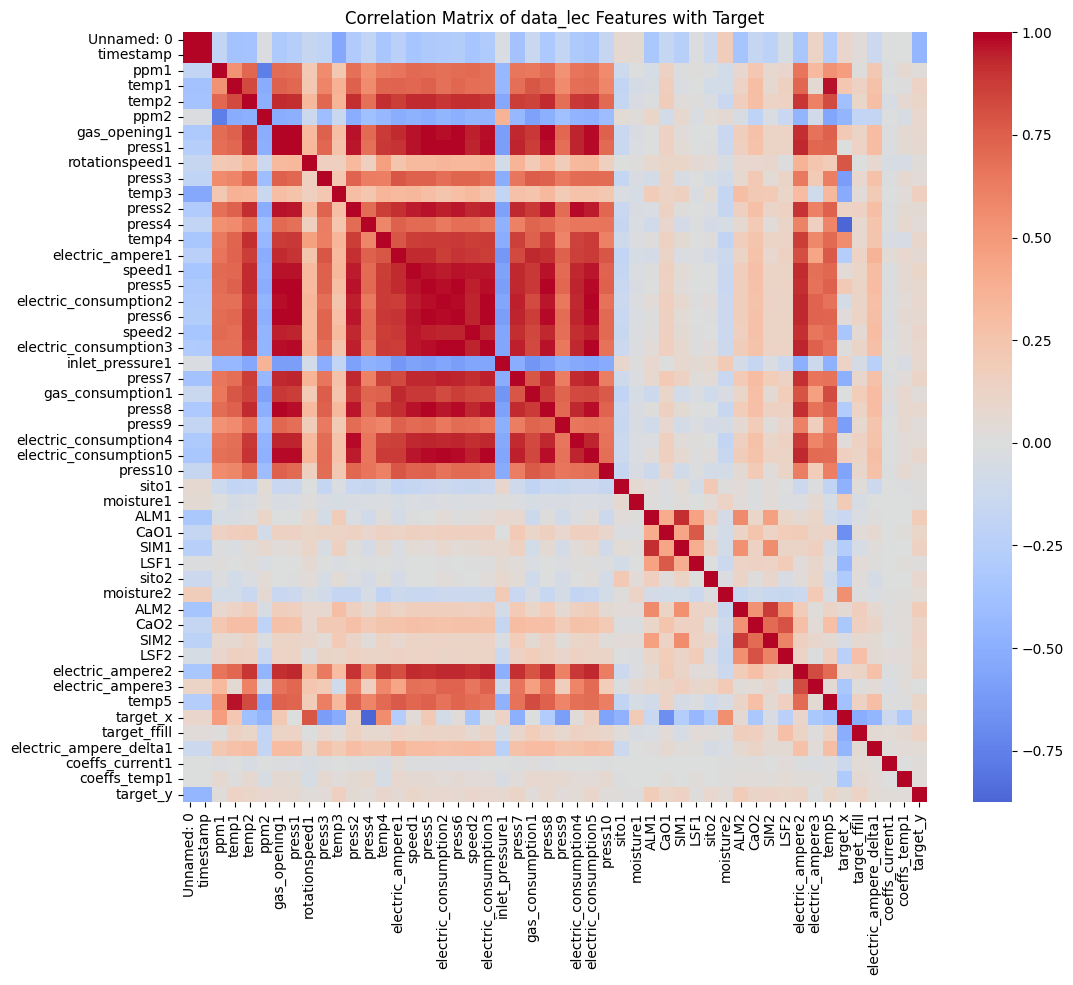

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Проверка временного интервала data_lec
data_lec['timestamp'] = pd.to_datetime(data_lec['timestamp'])
time_diffs = data_lec['timestamp'].diff().value_counts()
print("\n=== Частота интервалов времени в data_lec ===")
print(time_diffs.head(10))

# 2. Проверка пропусков
print("\n=== Процент пропусков в data_lec ===")
missing_percentage = data_lec.isnull().mean() * 100
print(missing_percentage[missing_percentage > 0])

# 3. Визуализация target
plt.figure(figsize=(10, 6))
plt.plot(target_lec['timestamp'], target_lec['target'], marker='o', linestyle='-')
plt.title('Target Over Time')
plt.xlabel('Time')
plt.ylabel('Target')
plt.grid(True)
plt.show()

# 4. Корреляция между признаками и target
# Объединяем по timestamp
merged_data = pd.merge_asof(data_lec.sort_values('timestamp'), target_lec.sort_values('timestamp'), on='timestamp')
correlation_matrix = merged_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of data_lec Features with Target')
plt.show()


=== Названия столбцов в merged_data ===
Index(['timestamp', 'target_x', 'Unnamed: 0', 'ppm1', 'temp1', 'temp2', 'ppm2',
       'gas_opening1', 'press1', 'rotationspeed1', 'press3', 'temp3', 'press2',
       'press4', 'temp4', 'electric_ampere1', 'speed1', 'press5',
       'electric_consumption2', 'press6', 'speed2', 'electric_consumption3',
       'inlet_pressure1', 'press7', 'gas_consumption1', 'press8', 'press9',
       'electric_consumption4', 'electric_consumption5', 'press10', 'sito1',
       'moisture1', 'ALM1', 'CaO1', 'SIM1', 'LSF1', 'sito2', 'moisture2',
       'ALM2', 'CaO2', 'SIM2', 'LSF2', 'electric_ampere2', 'electric_ampere3',
       'temp5', 'target_y', 'target_ffill', 'electric_ampere_delta1',
       'coeffs_current1', 'coeffs_temp1'],
      dtype='object')
Используем столбец: target_x


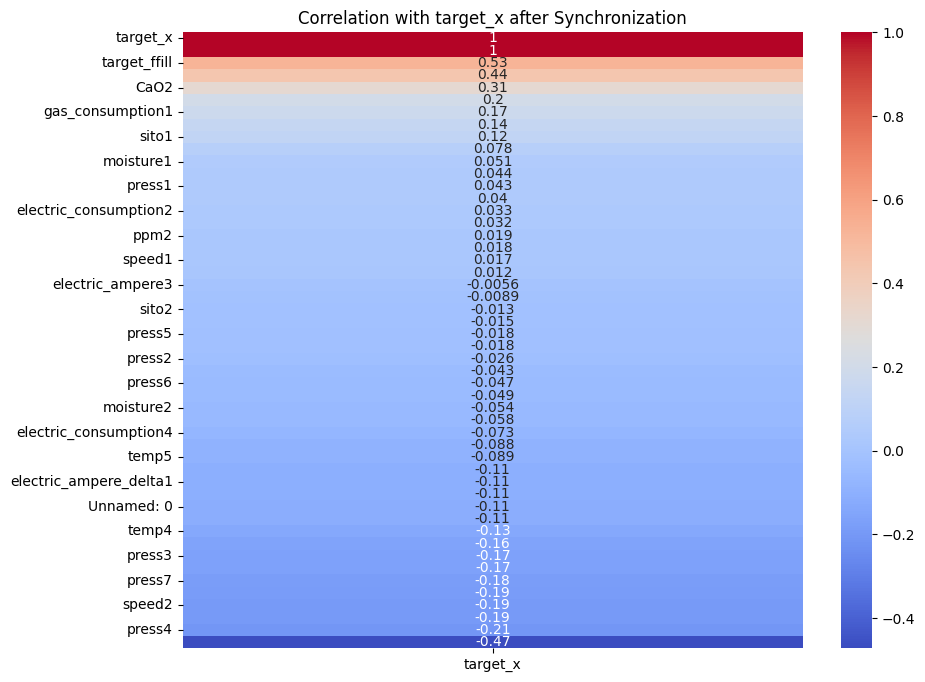

In [ ]:
# Проверим, какие колонки есть в merged_data
print("=== Названия столбцов в merged_data ===")
print(merged_data.columns)

target_col = [col for col in merged_data.columns if 'target' in col][0]
print(f"Используем столбец: {target_col}")

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(merged_data.corr()[[target_col]].sort_values(target_col, ascending=False), annot=True, cmap='coolwarm')
plt.title(f'Correlation with {target_col} after Synchronization')
plt.show()


Наблюдения:
Ключевые признаки с сильной корреляцией:

target_ffill (0.53) – ожидаемо, поскольку это форвард-фил таргета.
CaO2 (0.44) – важный признак.
gas_consumption1 (0.31) – сильная зависимость, что логично по задаче.
Остальные признаки слабо коррелируют с target_x. Их выкинем. 

### Task 1

Попробуем xgboost

In [8]:
!pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 2.0 MB/s eta 0:00:0000:0100:010m


=== Качество модели XGBoost ===
RMSE: 1.2085
MAE: 0.8507


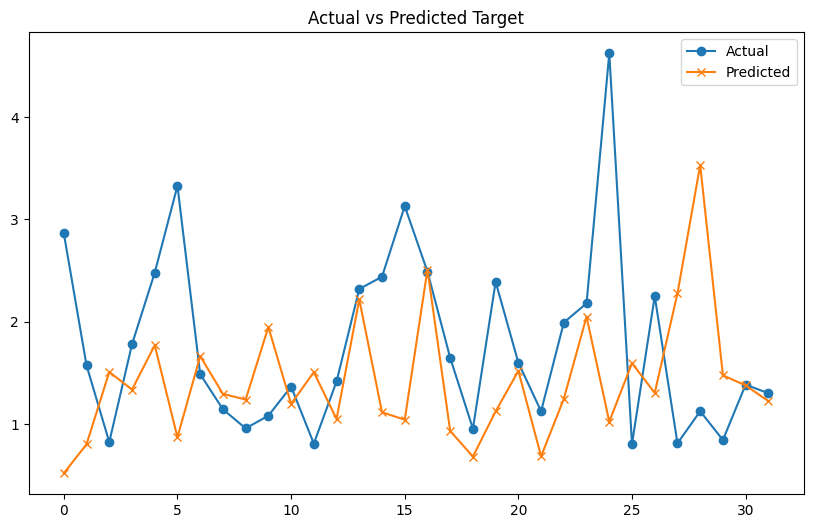

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb
import numpy as np

correlated_features = ['CaO2', 'gas_consumption1', 'sito1', 'moisture1', 'press1', 'electric_consumption2']

X = merged_data[correlated_features]
y = merged_data['target_x']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"=== Качество модели XGBoost ===")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title('Actual vs Predicted Target')
plt.legend()
plt.show()


вероятно, можно улучшить

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.2

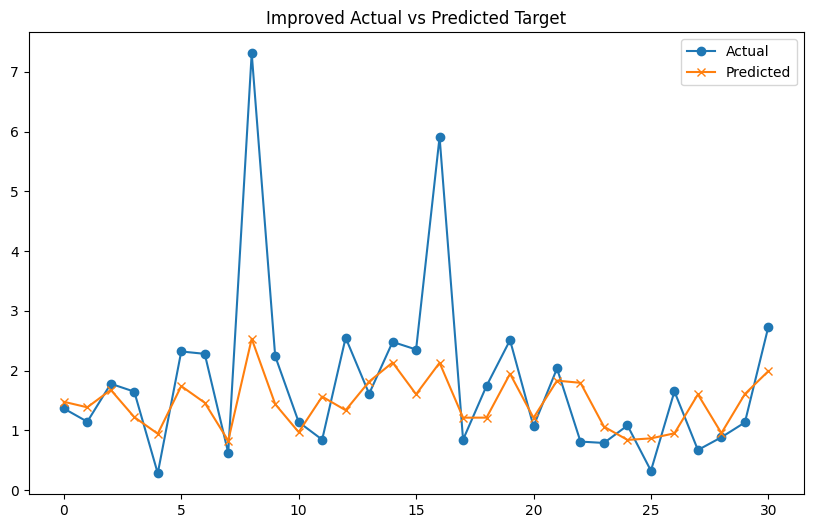

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Добавим лаги и скользящее среднее
def add_features(df, target_col, lags=3, rolling_window=5):
    for i in range(1, lags + 1):
        df[f'{target_col}_lag_{i}'] = df[target_col].shift(i)
    df[f'{target_col}_rolling_mean'] = df[target_col].rolling(window=rolling_window).mean()
    return df

enhanced_data = add_features(merged_data, 'target_x', lags=3, rolling_window=5)
enhanced_data = enhanced_data.dropna()

X = enhanced_data[['CaO2', 'gas_consumption1', 'sito1', 'moisture1', 
                   'press1', 'electric_consumption2', 
                   'target_x_lag_1', 'target_x_lag_2', 'target_x_lag_3', 
                   'target_x_rolling_mean']]

y = enhanced_data['target_x']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0]
}

model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print(f"Лучшие параметры: {grid_search.best_params_}")

y_pred = best_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print(f"RMSE после улучшений: {rmse:.4f}")
print(f"MAE после улучшений: {mae:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title('Improved Actual vs Predicted Target')
plt.legend()
plt.show()


ближе, но такое

Epoch 1/100


/Users/stas/miniforge3/envs/tf-metal/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 0.0255 - val_loss: 0.0190
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0227 - val_loss: 0.0165
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0178 - val_loss: 0.0171
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0197 - val_loss: 0.0166
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0232 - val_loss: 0.0157
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0289 - val_loss: 0.0158
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0188 - val_loss: 0.0154
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0164 - val_loss: 0.0152
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0210 - val_loss: 0.0151
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0281 - val_loss: 0.0151
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0148 - val_loss: 0.0152
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0202 - val_loss: 0.0153
E

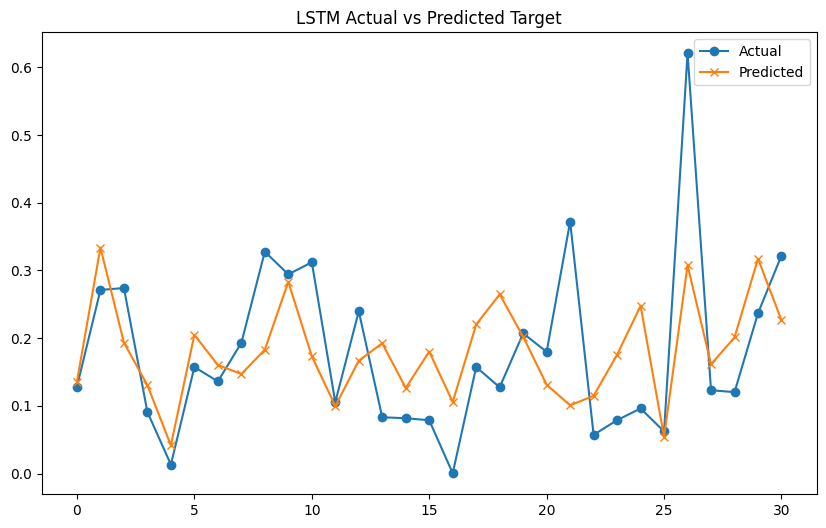

RMSE LSTM: 0.1070
MAE LSTM: 0.0812


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping

def prepare_lstm_data(df, target_col, time_steps=5):
    X, y = [], []
    for i in range(len(df) - time_steps):
        X.append(df.iloc[i:i+time_steps].values)
        y.append(df[target_col].iloc[i+time_steps])
    return np.array(X), np.array(y)

lstm_features = ['CaO2', 'gas_consumption1', 'sito1', 'moisture1', 
                 'press1', 'electric_consumption2', 'target_x']
scaled_data = MinMaxScaler().fit_transform(merged_data[lstm_features])

time_steps = 5
X_lstm, y_lstm = prepare_lstm_data(pd.DataFrame(scaled_data), target_col=6, time_steps=time_steps)

X_train, X_test, y_train, y_test = train_test_split(X_lstm, y_lstm, test_size=0.2, random_state=42)

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(time_steps, X_train.shape[2])))
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    epochs=100, batch_size=16, verbose=1, callbacks=[early_stop])

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE после улучшений: {rmse:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title('LSTM Actual vs Predicted Target')
plt.legend()
plt.show()

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print(f"RMSE LSTM: {rmse:.4f}")
print(f"MAE LSTM: {mae:.4f}")


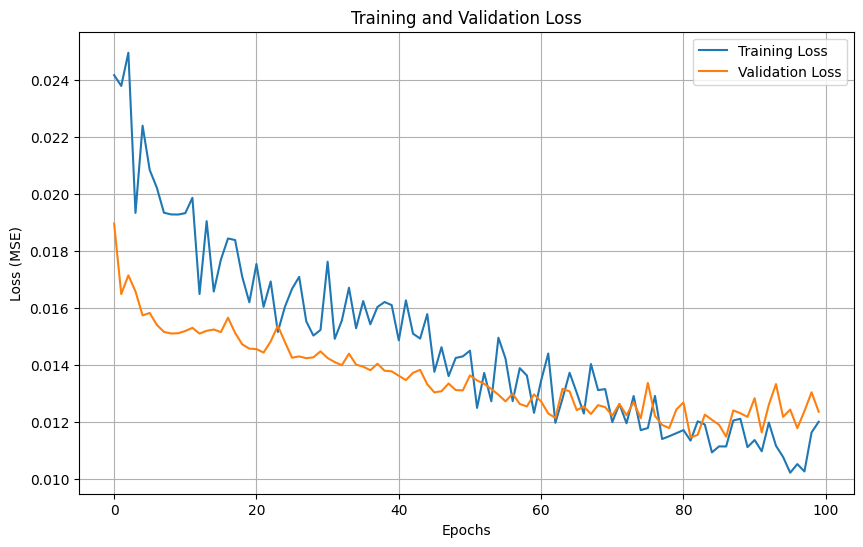

In [ ]:
# Визуализация функции потерь на обучении и валидации
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid()
plt.show()

Кажется, что достигли хороших результатов, судя по графикам предсказывает достаточно точно. Нет предсказания большого пика только(

### Task 2

Epoch 1/50


/Users/stas/miniforge3/envs/tf-metal/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 162ms/step - loss: 3.0543 - val_loss: 2.0217
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 2.1886 - val_loss: 1.5861
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 2.2375 - val_loss: 1.1277
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 1.2600 - val_loss: 0.7141
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 1.1549 - val_loss: 0.6547
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.9306 - val_loss: 0.7268
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.9576 - val_loss: 0.6219
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 1.1981 - val_loss: 0.6073
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.8409 - val_loss: 0.6113
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 1.3540 - val_loss: 0.6231
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.8610 - val_loss: 0.6198
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 1.1510 - val_loss: 0.6079
Epoch 13/50

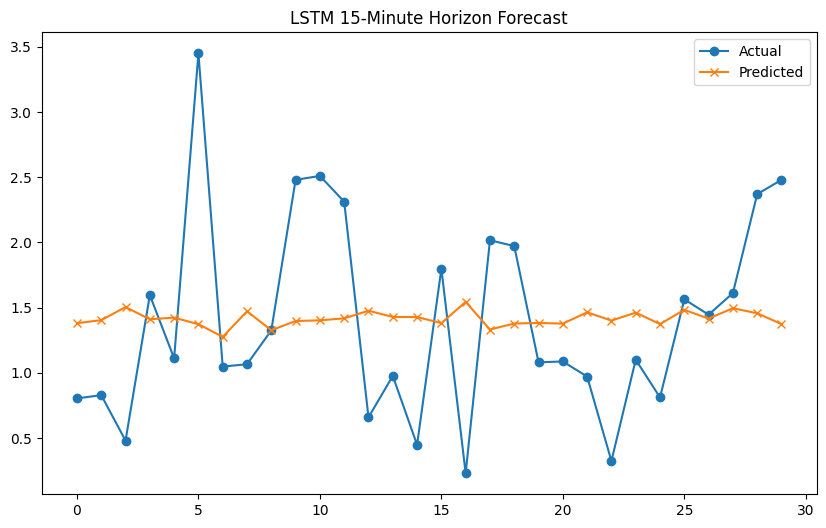

In [ ]:
merged_data['target_future'] = merged_data['target_x'].shift(-3)

future_data = merged_data.dropna(subset=['target_future'])

features = ['CaO2', 'gas_consumption1', 'sito1', 'moisture1', 'press1', 'electric_consumption2']
X = future_data[features]
y = future_data['target_future']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

time_steps = 5
def prepare_lstm_data(df, y, time_steps=5):
    X_lstm, y_lstm = [], []
    for i in range(len(df) - time_steps):
        X_lstm.append(df[i:i+time_steps])
        y_lstm.append(y[i+time_steps])
    return np.array(X_lstm), np.array(y_lstm)

X_lstm, y_lstm = prepare_lstm_data(X_scaled, y, time_steps)

X_train, X_test, y_train, y_test = train_test_split(X_lstm, y_lstm, test_size=0.2, random_state=42)

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(time_steps, X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    epochs=50, batch_size=16, callbacks=[early_stop], verbose=1)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print(f"RMSE на горизонте 15 минут: {rmse:.4f}")
print(f"MAE на горизонте 15 минут: {mae:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title('LSTM 15-Minute Horizon Forecast')
plt.legend()
plt.show()


Model: "functional_26"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_20      │ (None, 5, 6)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_70 (Dense)    │ (None, 5, 64)     │        448 │ input_layer_20[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 5, 64)     │     33,216 │ dense_70[0][0],   │
│ (MultiHeadAttentio… │                   │            │ dense_70[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_71 (Dense)    │ (None, 5, 64)     │      4,160 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_64          │ (None, 5, 64)     │          0 │ dense_71[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_32 (Add)        │ (None, 5, 64)     │          0 │ dense_70[0][0],   │
│                     │                   │            │ dropout_64[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 5, 64)     │        128 │ add_32[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_72 (Dense)    │ (None, 5, 128)    │      8,320 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_65          │ (None, 5, 128)    │          0 │ dense_72[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_73 (Dense)    │ (None, 5, 64)     │      8,256 │ dropout_65[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_33 (Add)        │ (None, 5, 64)     │          0 │ layer_normalizat… │
│                     │                   │            │ dense_73[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 5, 64)     │        128 │ add_33[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 5, 64)     │     33,216 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_74 (Dense)    │ (None, 5, 64)     │      4,160 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_67          │ (None, 5, 64)     │          0 │ dense_74[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_34 (Add)        │ (None, 5, 64)     │          0 │ layer_normalizat… │
│                     │                   │            │ dropout_67[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 5, 64)     │        128 │ add_34[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_75 (Dense)    │ (None, 5, 128)    │      8,320 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_68          │ (None, 5, 128)    │          0 │ dense_75[0][0]  

 Total params: 163,393 (638.25 KB)

 Trainable params: 163,393 (638.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 412ms/step - loss: 4.9591 - val_loss: 1.1620
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 1.3719 - val_loss: 1.0557
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.9299 - val_loss: 0.5880
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 1.1817 - val_loss: 0.6486
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 1.1238 - val_loss: 0.5801
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 1.2486 - val_loss: 0.5669
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 1.3799 - val_loss: 0.5810
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.7777 - val_loss: 0.5955
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 1.0526 - val_loss: 0.5777
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.9516 - val_loss: 0.5838
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 1.3111 - val_loss: 0.5393
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 1.0739 - val_loss: 0.6830

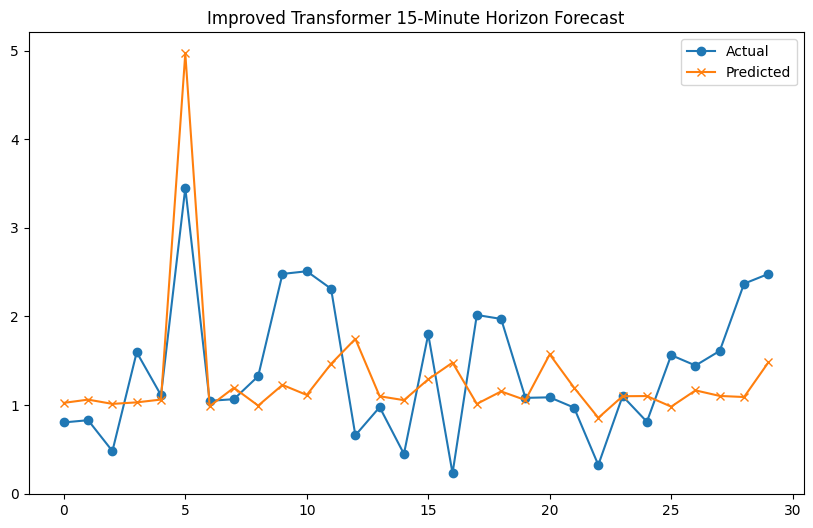

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, MultiHeadAttention, LayerNormalization, Dropout
from tensorflow.keras.models import Model
from sklearn.preprocessing import MinMaxScaler

time_steps = 5
target_col = 'target_future'

merged_data['target_future'] = merged_data['target_x'].shift(-3)
data = merged_data.dropna(subset=['target_future'])

features = ['CaO2', 'gas_consumption1', 'sito1', 'moisture1', 'press1', 'electric_consumption2']
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(data[features])

def prepare_transformer_data(X, y, time_steps=5):
    X_seq, y_seq = [], []
    for i in range(len(X) - time_steps):
        X_seq.append(X[i:i+time_steps])
        y_seq.append(y[i+time_steps])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = prepare_transformer_data(scaled_features, data['target_future'].values, time_steps)

X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

def build_deep_transformer(input_shape):
    inputs = Input(shape=input_shape)
    x = Dense(64)(inputs)  
    
    for _ in range(3):
        attn_output = MultiHeadAttention(num_heads=4, key_dim=32)(x, x)
        attn_output = Dense(64)(attn_output)  
        attn_output = Dropout(0.1)(attn_output)
        attn_output = LayerNormalization(epsilon=1e-6)(x + attn_output)  # Residual

        ff_output = Dense(128, activation='relu')(attn_output)
        ff_output = Dropout(0.1)(ff_output)
        ff_output = Dense(64)(ff_output)
        x = LayerNormalization(epsilon=1e-6)(attn_output + ff_output)  # Residual

    x = tf.keras.layers.Flatten()(x)
    outputs = Dense(1)(x)
    
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='mse')
    return model

deep_transformer = build_deep_transformer((time_steps, X_train.shape[2]))
deep_transformer.summary()

history = deep_transformer.fit(X_train, y_train, validation_data=(X_test, y_test), 
                               epochs=50, batch_size=16, verbose=1)

y_pred = deep_transformer.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print(f"RMSE Deep Transformer: {rmse:.4f}")
print(f"MAE Deep Transformer: {mae:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title('Improved Transformer 15-Minute Horizon Forecast')
plt.legend()
plt.show()

Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_17      │ (None, 10, 10)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_4     │ (None, 10, 64)    │     11,008 │ input_layer_17[0… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 10, 64)    │     33,216 │ bidirectional_4[… │
│ (MultiHeadAttentio… │                   │            │ bidirectional_4[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_52          │ (None, 10, 64)    │          0 │ multi_head_atten… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_25 (Add)        │ (None, 10, 64)    │          0 │ bidirectional_4[… │
│                     │                   │            │ dropout_52[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 10, 64)    │        128 │ add_25[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_6 (Flatten) │ (None, 640)       │          0 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_55 (Dense)    │ (None, 128)       │     82,048 │ flatten_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_53          │ (None, 128)       │          0 │ dense_55[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_56 (Dense)    │ (None, 1)         │        129 │ dropout_53[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 126,529 (494.25 KB)

 Trainable params: 126,529 (494.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 187ms/step - loss: 6.2869 - val_loss: 0.6786
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 1.9846 - val_loss: 0.8973
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 1.7481 - val_loss: 1.1660
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 1.5662 - val_loss: 0.6581
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.9815 - val_loss: 0.6912
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 1.2971 - val_loss: 0.6506
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 1.6359 - val_loss: 0.6638
Epoch 8/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.8888 - val_loss: 0.7630
Epoch 9/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 1.2115 - val_loss: 0.6582
Epoch 10/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 1.3208 - val_loss: 0.6681
Epoch 11/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.9295 - val_loss: 0.6928
Epoch 12/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.8740 - val_l

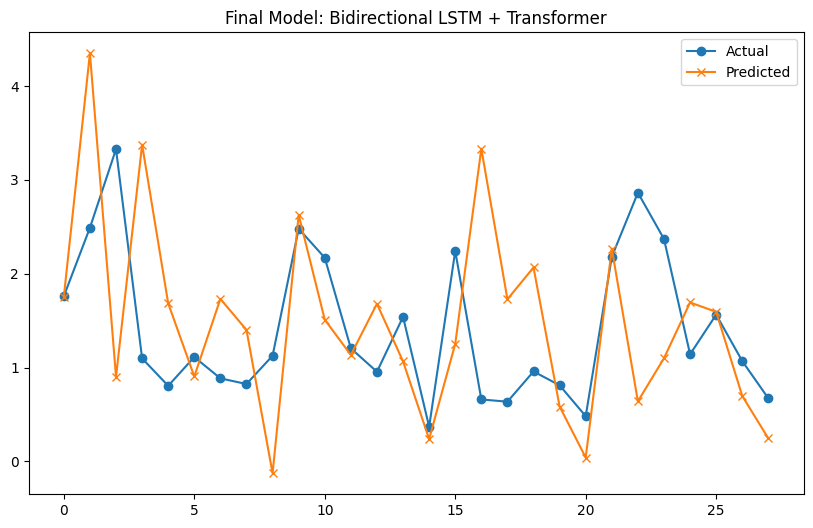

In [ ]:
from tensorflow.keras.layers import Input, Dense, LSTM, Bidirectional, MultiHeadAttention, Dropout, LayerNormalization, Add, Flatten
from tensorflow.keras.models import Model
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

def add_features(df, target_col):
    df['lag_1'] = df[target_col].shift(1)
    df['lag_2'] = df[target_col].shift(2)
    df['rolling_mean_3'] = df[target_col].rolling(3).mean()
    df['diff_1'] = df[target_col].diff(1)
    return df.dropna()

future_data = add_features(merged_data, 'target_x')
scaled_features = MinMaxScaler().fit_transform(future_data[['CaO2', 'gas_consumption1', 'sito1', 'moisture1', 
                                                            'press1', 'electric_consumption2', 
                                                            'lag_1', 'lag_2', 'rolling_mean_3', 'diff_1']])

time_steps = 10
def prepare_sequence_data(X, y, time_steps):
    X_seq, y_seq = [], []
    for i in range(len(X) - time_steps):
        X_seq.append(X[i:i+time_steps])
        y_seq.append(y[i+time_steps])
    return np.array(X_seq), np.array(y_seq)

y_future = future_data['target_x'].shift(-3).dropna().values
X_trimmed = scaled_features[:len(y_future)]
X_seq, y_seq = prepare_sequence_data(X_trimmed, y_future, time_steps=10)

X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

def build_lstm_transformer(input_shape):
    inputs = Input(shape=input_shape)

    lstm_output = Bidirectional(LSTM(32, return_sequences=True))(inputs)
    
    attn_output = MultiHeadAttention(num_heads=4, key_dim=32)(lstm_output, lstm_output)
    
    attn_output = Dropout(0.1)(attn_output)

    res_output = Add()([lstm_output, attn_output])
    res_output = LayerNormalization(epsilon=1e-6)(res_output)

    x = Flatten()(res_output)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.2)(x)
    outputs = Dense(1)(x)

    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='mse')
    return model

super_model = build_lstm_transformer((time_steps, X_train.shape[2]))
super_model.summary()

history = super_model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                          epochs=200, batch_size=16, verbose=1)

y_pred = super_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title('Final Model: Bidirectional LSTM + Transformer')
plt.legend()
plt.show()


мне нравится)

### Task 3

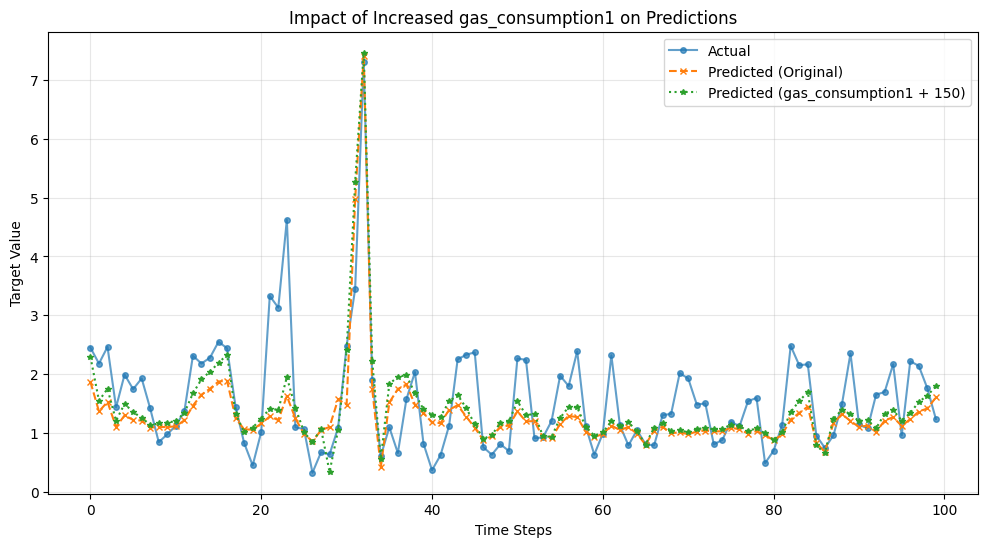


Impact Analysis of Increased gas_consumption1:
Mean difference in predictions: 0.0950
Median difference: 0.0715
Std of differences: 0.1435
Max difference: 0.9203
Min difference: -0.7646

Model Performance Metrics:
RMSE (Original): 0.8053
RMSE (Adjusted): 0.7623


In [ ]:
def analyze_gas_consumption_impact(merged_data, deep_transformer, scaler, time_steps=5):
    merged_data['target_future'] = merged_data['target_x'].shift(-3)
    
    features = ['CaO2', 'gas_consumption1', 'sito1', 'moisture1', 
                'press1', 'electric_consumption2']
    
    adjusted_data = merged_data.copy()
    adjusted_data['gas_consumption1'] += 150
    
    valid_data = merged_data.dropna(subset=features + ['target_future'])
    adjusted_data = adjusted_data.loc[valid_data.index]
    
    scaled_original = scaler.transform(valid_data[features])
    scaled_adjusted = scaler.transform(adjusted_data[features])
    
    def prepare_sequences(scaled_data):
        sequences = []
        for i in range(len(scaled_data) - time_steps):
            sequences.append(scaled_data[i:(i + time_steps)])
        return np.array(sequences)
    
    X_original = prepare_sequences(scaled_original)
    X_adjusted = prepare_sequences(scaled_adjusted)
    
    y_actual = valid_data['target_future'].values[time_steps:]
    
    y_pred_original = deep_transformer.predict(X_original, verbose=0)
    y_pred_adjusted = deep_transformer.predict(X_adjusted, verbose=0)
    
    plt.figure(figsize=(12, 6))
    plt.plot(y_actual[:100], label='Actual', alpha=0.7, marker='o', markersize=4)
    plt.plot(y_pred_original[:100], label='Predicted (Original)', 
             linestyle='--', marker='x', markersize=4)
    plt.plot(y_pred_adjusted[:100], label='Predicted (gas_consumption1 + 150)', 
             linestyle=':', marker='*', markersize=4)
    plt.title('Impact of Increased gas_consumption1 on Predictions')
    plt.xlabel('Time Steps')
    plt.ylabel('Target Value')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    delta = y_pred_adjusted - y_pred_original
    
    print("\nImpact Analysis of Increased gas_consumption1:")
    print(f"Mean difference in predictions: {np.mean(delta):.4f}")
    print(f"Median difference: {np.median(delta):.4f}")
    print(f"Std of differences: {np.std(delta):.4f}")
    print(f"Max difference: {np.max(delta):.4f}")
    print(f"Min difference: {np.min(delta):.4f}")
    
    rmse_original = np.sqrt(mean_squared_error(y_actual, y_pred_original))
    rmse_adjusted = np.sqrt(mean_squared_error(y_actual, y_pred_adjusted))
    
    print("\nModel Performance Metrics:")
    print(f"RMSE (Original): {rmse_original:.4f}")
    print(f"RMSE (Adjusted): {rmse_adjusted:.4f}")
    
    return y_pred_original, y_pred_adjusted, y_actual, delta

y_pred_original, y_pred_adjusted, y_actual, delta = analyze_gas_consumption_impact(
    merged_data=merged_data,
    deep_transformer=deep_transformer,
    scaler=scaler,  
    time_steps=5    
)

Интерпретация:
В большинстве случаев увеличение gas_consumption1 на 150 не вызывает резкого изменения таргета. Влияние может быть разным в зависимости от состояния системы (например, при высоком gas_consumption1 эффект ослабевает или становится отрицательным). Уверенность модели: Снижение RMSE говорит, что модель лучше адаптируется к "поправке" данных.
